In [1]:
import numpy as np
import pandas as pd
import os
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../runs/results_chawin.csv')
df = df.replace({'apply_patch': 'True', 'random_patch': 'True'}, 1)
df = df.replace({'apply_patch': 'False', 'random_patch': 'False'}, 0)
for col in ['apply_patch', 'random_patch']:
    df[col] = df[col].astype(float).astype(bool)
df[['fnr_octagon', 'num_octagon_labels', 'num_octagon_with_patch', 'fn_octagon', 'apply_patch']] #.tail()

,fnr_octagon,num_octagon_labels,num_octagon_with_patch,fn_octagon,apply_patch
0,0.197842,834.0,571.0,165.0,True
1,0.187524,834.0,0.0,156.0,True
2,0.833333,12.0,10.0,10.0,True
3,0.774732,839.0,561.0,650.0,True
4,0.233611,839.0,561.0,196.0,True
5,0.408748,12.0,10.0,5.0,True
6,0.301887,106.0,51.0,32.0,True
7,0.228844,839.0,520.0,192.0,True
8,0.197855,839.0,520.0,166.0,True
9,0.387842,10.0,8.0,4.0,True


In [3]:
# df = pd.read_csv('../runs/results_chawin.csv')
df = pd.read_csv('../runs/results.csv')
# df = pd.read_csv('../runs/results_.csv')
df = df.replace({'apply_patch': 'True', 'random_patch': 'True'}, 1)
df = df.replace({'apply_patch': 'False', 'random_patch': 'False'}, 0)
for col in ['apply_patch', 'random_patch']:
    df[col] = df[col].astype(float).astype(bool)

# df[['fnr_octagon', 'num_octagon_labels', 'num_octagon_with_patch', 'fn_octagon', 'apply_patch', 'generate_patch']].iloc[[2, 0, 4]]
# df[['fnr_octagon', 'num_octagon_labels', 'num_octagon_with_patch', 'fn_octagon', 'apply_patch', 'generate_patch']]
df[['fnr_octagon', 'num_octagon_labels', 'num_octagon_with_patch', 'fn_octagon', 'apply_patch']]

,fnr_octagon,num_octagon_labels,num_octagon_with_patch,fn_octagon,apply_patch
0,0.247797,885.0,571.0,219.0,True
1,0.275407,885.0,571.0,244.0,True
2,0.206545,885.0,0.0,183.0,False
3,0.264407,885.0,571.0,234.0,True
4,0.275403,885.0,571.0,244.0,True
5,0.270668,871.0,66.0,236.0,True
6,0.270668,871.0,66.0,236.0,True
7,0.212762,871.0,66.0,185.0,True
8,0.558192,885.0,571.0,494.0,True
9,0.447458,885.0,571.0,396.0,True


In [3]:
df_results_per_image = pd.read_csv('../runs/val_chawin/exp_mapillary_rp2_patch_11/results_per_image.csv')
df_results_per_image[df_results_per_image['fn'] > 0]

,filename,num_octagons,num_patches,fnr,fn
14,SFhuI4R6dyCdgwFYmMeg7A.jpg,1,1.0,NaN,1
36,T0kvHFtwoqL3HH44FpBzOg.jpg,2,1.0,NaN,1
82,_69EblZbqXUcjYKu7myKDg.jpg,1,1.0,NaN,1
86,U6RnrAjXMMBCX4SDEnUScQ.jpg,1,1.0,NaN,1
145,Q3eC_uZh20VujxdQ1ttzRA.jpg,1,1.0,NaN,1
...,...,...,...,...,...
3752,aZFY9j2MSVoev1DLFSLJlg.jpg,1,0.0,NaN,1
3836,h800vTpwASXF_N0SROdpZw.jpg,1,0.0,NaN,1
3872,griKSwn3GSRN2dGb8fQyDQ.jpg,1,0.0,NaN,1
3957,_fafs0ETmuIe2cEr8oQHgA.jpg,1,1.0,NaN,1


In [4]:
# f = open('../runs/val/exp/bg_filenames.txt', 'r')
# lines = f.readlines()
# bg_filenames = [x.strip('\n') for x in lines]
# print(bg_filenames)

df_results_per_label_no_patch = pd.read_csv('../runs/val/exp_mapillary_no_patch_0/results_per_label.csv')
df_results_per_label_rp2_patch = pd.read_csv('../runs/val/exp_mapillary_rp2_patch_7/results_per_label.csv')

merged_df = df_results_per_label_no_patch.merge(df_results_per_label_rp2_patch, on=['filename', 'obj_id', 'sign_width', 'sign_height'], suffixes=['_no_patch', '_patch'])
assert len(merged_df) == len(df_results_per_label_rp2_patch) & len(merged_df) == len(df_results_per_label_no_patch)

merged_df = merged_df[merged_df['correct_prediction_no_patch'] == 1]
merged_df['fn'] = merged_df['correct_prediction_no_patch'] - merged_df['correct_prediction_patch']
merged_df = merged_df.sort_values(by=['fn', 'filename'], ascending=[False, True])
merged_df
# successful_attack_filenames = set(merged_df[merged_df['change_in_fn'] > 0]['filename'])
# len(successful_attack_filenames_2)

# merged_df[merged_df['filename'].isin(bg_filenames)]

merged_df['avg_sign_dim'] = (merged_df['sign_width'] + merged_df['sign_height'])/2
merged_df

,filename,obj_id,label_no_patch,correct_prediction_no_patch,sign_width,sign_height,confidence_no_patch,label_patch,correct_prediction_patch,confidence_patch,fn,avg_sign_dim
608,-9KGl9SjjCNY1k7e7kZAQw.jpg,2.0,14.0,1,53.749996,68.749969,0.891516,14.0,0,0.006548,1,61.249983
609,-9bvNvBWAX3xjKfJzS4vTA.jpg,3.0,14.0,1,40.392212,42.745056,0.899050,14.0,0,0.070775,1,41.568634
614,-LtOhSguWQXyerbzUN6HpA.jpg,5.0,14.0,1,60.784359,56.862732,0.918845,14.0,0,0.176949,1,58.823545
613,-YF7yrS0WkRqW2CUBmSOtw.jpg,0.0,14.0,1,34.056274,34.056244,0.849954,14.0,0,0.007320,1,34.056259
130,-gSMw1gvzaUryheHPx00Zw.jpg,5.0,14.0,1,9.166687,26.388916,0.777415,14.0,0,0.172519,1,17.777802
...,...,...,...,...,...,...,...,...,...,...,...,...
343,ySHxhMy9QcDoR388eTWkaA.jpg,1.0,14.0,1,41.176392,40.000000,0.903549,14.0,1,0.893143,0,40.588196
359,yyxdgcPvb-RL11S6mMCmJw.jpg,1.0,14.0,1,25.000000,22.000000,0.849172,14.0,1,0.849172,0,23.500000
360,yyxdgcPvb-RL11S6mMCmJw.jpg,4.0,14.0,1,24.000031,22.999969,0.854073,14.0,1,0.854073,0,23.500000
353,zUmpHOqZRnu2eAeUBQFWkQ.jpg,5.0,14.0,1,35.686279,38.039246,0.905545,14.0,1,0.370276,0,36.862762


In [6]:
# # checking results per label are correct
# df_results_per_image = pd.read_csv('../runs/val/exp_mapillary_rp2_patch_0/results_per_image.csv')
# print(np.sum(df_results_per_image['fn']))

# print(len(df_results_per_label_rp2_patch) - np.sum(df_results_per_label_rp2_patch['correct_prediction']))


In [7]:
np.sum(merged_df['fn'])/571

0.5446584938704028

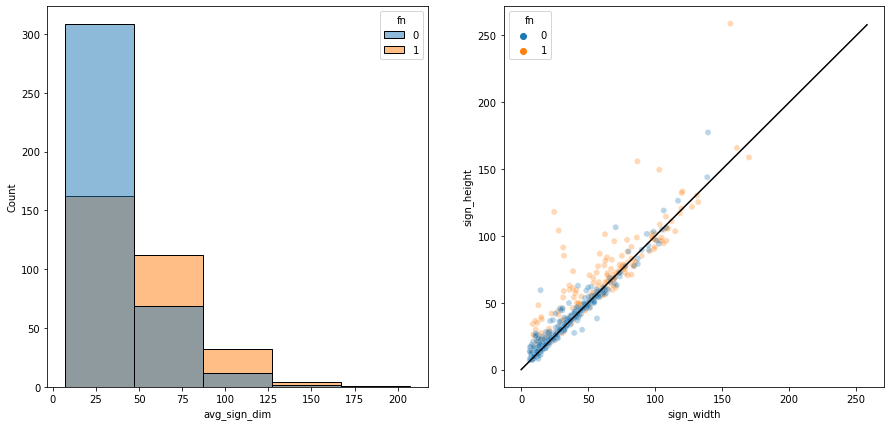

In [8]:
f, ax = plt.subplots(1, 2)
f.set_figheight(7)
f.set_figwidth(15)

sns.histplot(data=merged_df[merged_df['fn'] >= 0], x="avg_sign_dim", hue='fn', bins=5, ax=ax[0])
sns.scatterplot(x='sign_width', y='sign_height', data=merged_df[merged_df['fn'] >= 0], hue='fn', alpha=0.3, ax=ax[1])
ax[1].plot(np.arange(0, max(merged_df[merged_df['fn'] >= 0]['sign_height'])), np.arange(0, max(merged_df[merged_df['fn'] >= 0]['sign_height'])), color='black')

(0.0, 1.0)

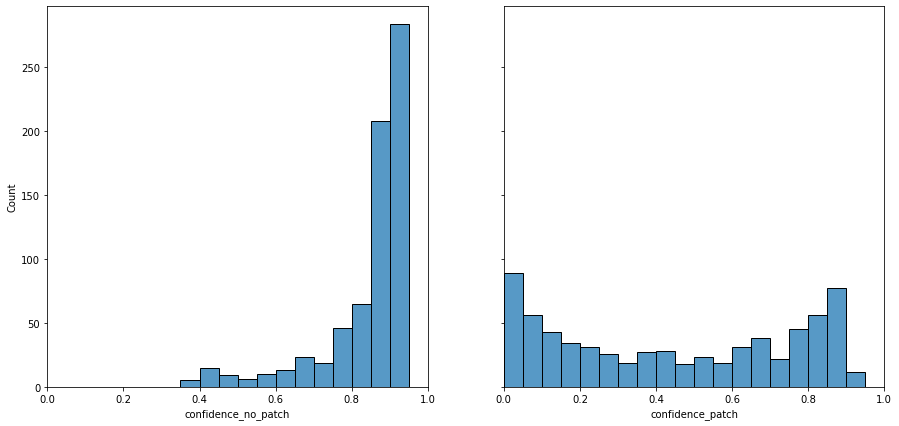

In [9]:
f, ax = plt.subplots(1, 2, sharey=True)
f.set_figheight(7)
f.set_figwidth(15)

bins=np.arange(0, 1.01, 0.05)
# sns.histplot(data=merged_df[merged_df['fn'] >= 0], x="confidence_no_patch", ax=ax[0], bins=bins)
# sns.histplot(data=merged_df[merged_df['fn'] >= 0], x="confidence_patch", ax=ax[1], bins=bins)

sns.histplot(data=merged_df, x="confidence_no_patch", ax=ax[0], bins=bins)
sns.histplot(data=merged_df, x="confidence_patch", ax=ax[1], bins=bins)

ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)


In [10]:
min(merged_df['confidence_no_patch'])

0.3634558916091919

In [11]:
merged_df['correct_prediction_no_patch'].value_counts()

1    702
Name: correct_prediction_no_patch, dtype: int64

In [12]:
successful_attack_filenames = set(merged_df[merged_df['fn'] > 0]['filename'])
len(successful_attack_filenames)

with open('../runs/successful_attack_filenames.txt', 'w') as f:
    for line in successful_attack_filenames:
        f.write(line)
        f.write('\n')
